# Coders Ready
## Monthly Internship Program for Professionals [MIPPs] - Dec, 2022
### Data Science and Business Analytics Internship
#### **Task:** Exploratory Data Analysis - Terrorism
#### **Problem Statement:** Perform EDA on dataset of "Global Terrorism" as a security/defence analyst to find out the hot zones of terrorism
#### **Author:** Rohit Rannavre

## Loading the Dataset

In [1]:
# importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
data = pd.read_csv('global_terrorism_dataset.csv', encoding='latin1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
# checking the shape of dataset
data.shape

(181691, 135)

## Data Pre-Processing

### *Renaming Features*

In [4]:
# checking the available columns
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
# creating a dataframe by selecting the features that are central to analysis
df = data[['iyear', 'imonth', 'country_txt', 'region_txt', 'city', 'success', 'suicide', 'attacktype1_txt', 
           'gname', 'weaptype1_txt', 'nwound', 'nkill']]
df.head()

,iyear,imonth,country_txt,region_txt,city,success,suicide,attacktype1_txt,gname,weaptype1_txt,nwound,nkill
0,1970,7,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,MANO-D,Unknown,0.0,1.0
1,1970,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,Philippines,Southeast Asia,Unknown,1,0,Assassination,Unknown,Unknown,0.0,1.0
3,1970,1,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Unknown,Explosives,NaN,NaN
4,1970,1,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Unknown,Incendiary,NaN,NaN


In [6]:
# renaming the features
df.rename(columns={'iyear':'year', 'imonth':'month', 'country_txt':'country', 'region_txt':'region', 
                   'attacktype1_txt': 'attack_type', 'gname':'outfit', 'weaptype1_txt': 'weapon_type', 'nkill': 'killed', 
                   'nwound':'wounded'}, inplace=True)

### *Handling the missing values*

In [7]:
# checking for the missing values
df.isnull().sum()

year               0
month              0
country            0
region             0
city             434
success            0
suicide            0
attack_type        0
outfit             0
weapon_type        0
wounded        16311
killed         10313
dtype: int64

In [8]:
# filling the missing values
df['city'] = df['city'].fillna('Unknown')
df['wounded'] = df['wounded'].fillna(0)
df['killed'] = df['killed'].fillna(0)

In [9]:
# making sure there is NO missing value
df.isnull().sum()

year           0
month          0
country        0
region         0
city           0
success        0
suicide        0
attack_type    0
outfit         0
weapon_type    0
wounded        0
killed         0
dtype: int64

### *Handling the datatypes*

In [10]:
# checking the datatypes
df.dtypes

year             int64
month            int64
country         object
region          object
city            object
success          int64
suicide          int64
attack_type     object
outfit          object
weapon_type     object
wounded        float64
killed         float64
dtype: object

In [11]:
# changing the datatypes of some columns
df['wounded'] = df['wounded'].astype('int')
df['killed'] = df['killed'].astype('int')

In [12]:
# making sure the datatypes are changed
df.dtypes

year            int64
month           int64
country        object
region         object
city           object
success         int64
suicide         int64
attack_type    object
outfit         object
weapon_type    object
wounded         int32
killed          int32
dtype: object

## Exploratory Data Analysis (EDA)

In [13]:
# checking the shape 
df.shape

(181691, 12)

> **Feature:** year

> **Feature Details:** It contains the year in which the incident occurred

> **Observation:**

- Data comes from 47 different years. Out of which, 2014 is the year witnessing the maximum number of terror attacks while 1973 the minimum

In [14]:
# checking the total number of unique years
df['year'].nunique()

47

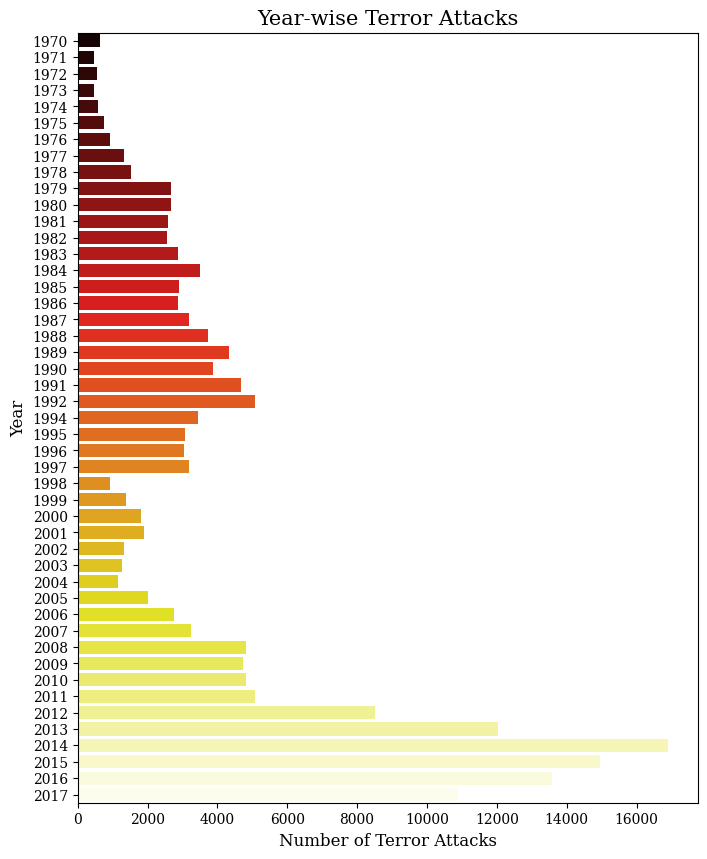

In [15]:
# year-wise terror attacks
plt.figure(figsize=(8, 10))
sns.countplot(data=df, y='year', palette='hot')
plt.title('Year-wise Terror Attacks', family='serif', size=15)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Terror Attacks', size=12, family='serif')
plt.ylabel('Year', size=12, family='serif')
plt.show()

> **Feature:** month

> **Feature Details:** It contains the number of the month in which the incident occurred

> **Observation:**

- Maximum terror attacks occurred in May while the minimum in December

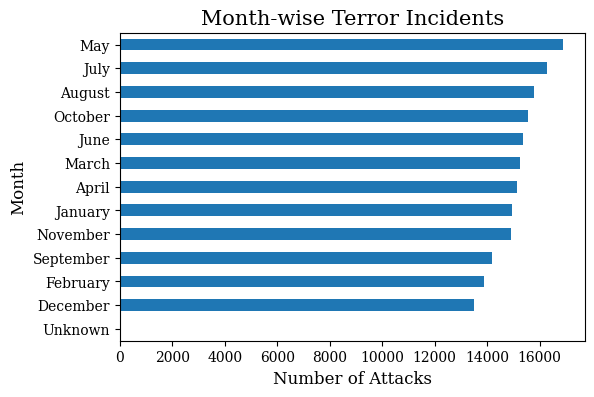

In [16]:
df['month'].map({0:'Unknown', 1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 
                 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}).value_counts().sort_values(ascending=True).plot.barh(figsize=(6,4))
plt.xlabel('Number of Attacks', size=12, family='serif')
plt.ylabel('Month', size=12, family='serif')
plt.title('Month-wise Terror Incidents', size=15, family='serif')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.show()

> **Feature:** country

> **Feature Details:** It identifies the country in which the incident occurred

> **Observation:**

- Out of the 205 countries listed, Iraq, Pakistan, Afghanistan, India, Colombia, Philippines, Peru, El Salvador, United Kingdon and Turkey seem to have suffered a lot


In [17]:
# getting the total number of countries
df['country'].nunique()

205

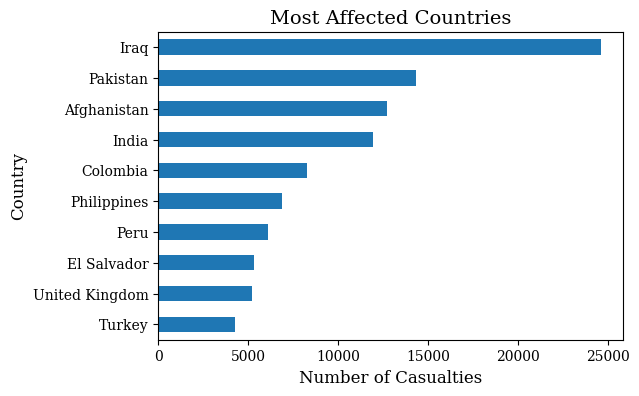

In [18]:
# top 10 countries that have suffered a lot
df['country'].value_counts().nlargest(10).sort_values(ascending=True).plot.barh(x=df['killed'], figsize=(6,4))
plt.xlabel('Number of Casualties', size=12, family='serif')
plt.ylabel('Country', size=12, family='serif')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Most Affected Countries', size=14, family='serif')
plt.show()

> **Feature:** region

> **Feature Details:** It identifies the region in which the incident occurred

> **Observation:**

- Out of the 12 regions, the Middle East & North African region have witnessed many terror attacks while the Australasia & Oceania the least

In [19]:
# checking the total number of regions
df['region'].nunique()

12

In [20]:
# getting the value count of regions
df['region'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region, dtype: int64

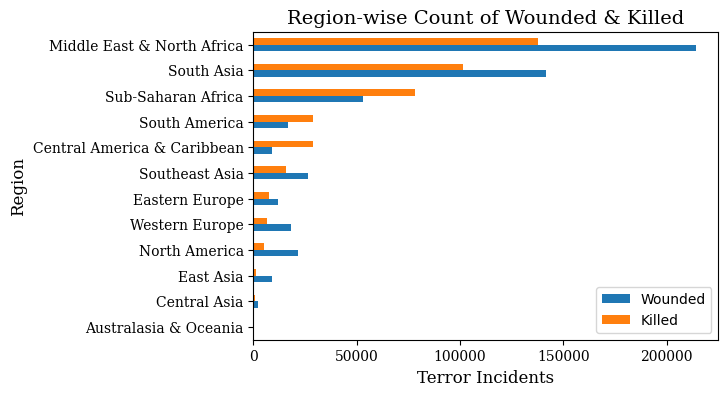

In [21]:
# visualization of region-wise wounded and killed
df.groupby('region')[['wounded', 'killed']].sum().sort_values(ascending=True, by='killed').plot.barh(figsize=(6,4))
plt.title('Region-wise Count of Wounded & Killed', family='serif', size=14)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Terror Incidents', family='serif', size=12)
plt.ylabel('Region', family='serif', size=12)
plt.legend(loc=4, labels=['Wounded', 'Killed'])
plt.show()

> **Feature:** city

> **Feature Details:** It indicates the name of the city, village, or town in which the incident occurred

> **Observation:**

Following is a region-wise list of cities which have suffered a lot from the menace of terror incidents 
- Middle East & North Africa: most > Baghdad & least > Fallujah
- South Asia: most > Karachi & least > Colombo                  
- South America: most > Lima & least > La Paz
- Sub-Saharan Africa: most > Mogadishu & least > Kanu            
- Western Europe: most > Belfast & least > Ajaccio              
- Southeast Asia: most >  Manila & least > Marawi                
- Central America & Caribbean: most > San Salvador & least > Panama City     
- Eastern Europe: most > Grozny & least > Pristina                  
- North America: most > New York City & least > Seattle                  
- East Asia: most >  Tokyo & least > Osaka                      
- Central Asia: most > Dushanbe & least > Zugdidi                    
- Australasia & Oceania: most > Sydney & least > Perth           

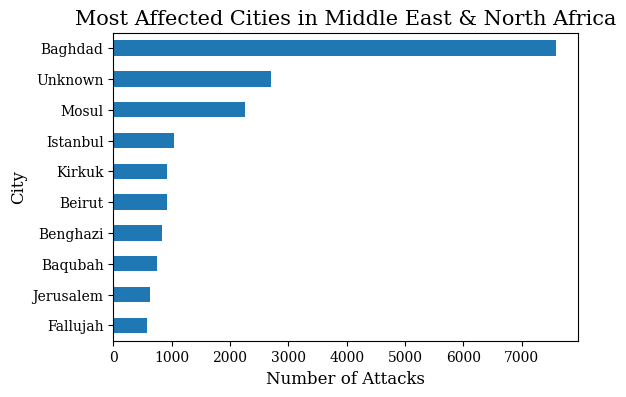

In [22]:
# affected cities in region: Middle East & North Africa
df.groupby('region').get_group('Middle East & North Africa')['city'].value_counts().nlargest(10).sort_values(ascending=True).plot.barh(figsize=(6,4))
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Attacks', size=12, family='serif')
plt.ylabel('City', size=12, family='serif')
plt.title('Most Affected Cities in Middle East & North Africa', size=15, family='serif')
plt.show()

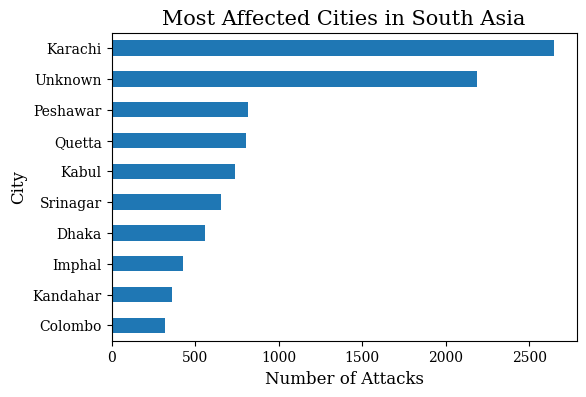

In [23]:
# affected cities in region: South Asia
df.groupby('region').get_group('South Asia')['city'].value_counts().nlargest(10).sort_values(ascending=True).plot.barh(figsize=(6,4))
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Attacks', size=12, family='serif')
plt.ylabel('City', size=12, family='serif')
plt.title('Most Affected Cities in South Asia', size=15, family='serif')
plt.show()

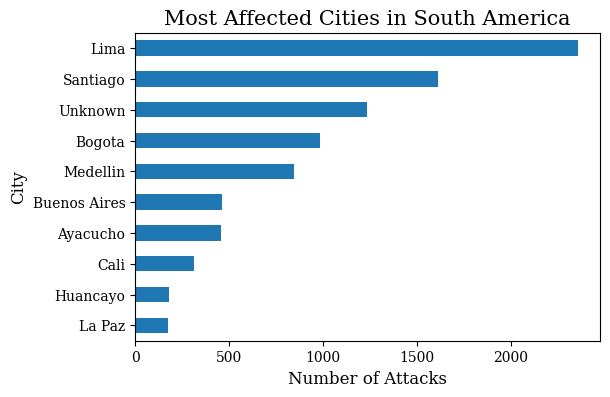

In [24]:
# affected cities in region: South America
df.groupby('region').get_group('South America')['city'].value_counts().nlargest(10).sort_values(ascending=True).plot.barh(figsize=(6,4))
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Attacks', size=12, family='serif')
plt.ylabel('City', size=12, family='serif')
plt.title('Most Affected Cities in South America', size=15, family='serif')
plt.show()

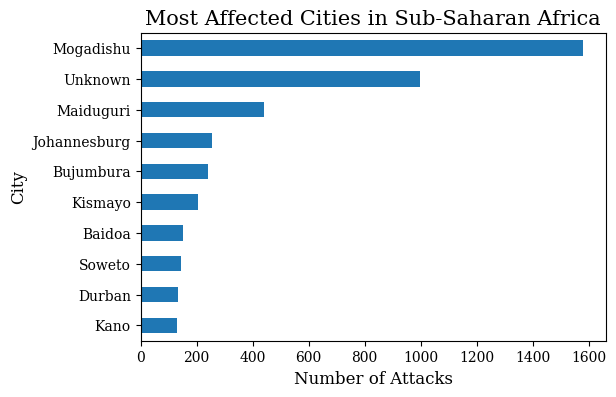

In [25]:
# affected cities in region: Sub-Saharan Africa
df.groupby('region').get_group('Sub-Saharan Africa')['city'].value_counts().nlargest(10).sort_values(ascending=True).plot.barh(figsize=(6,4))
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Attacks', size=12, family='serif')
plt.ylabel('City', size=12, family='serif')
plt.title('Most Affected Cities in Sub-Saharan Africa', size=15, family='serif')
plt.show()

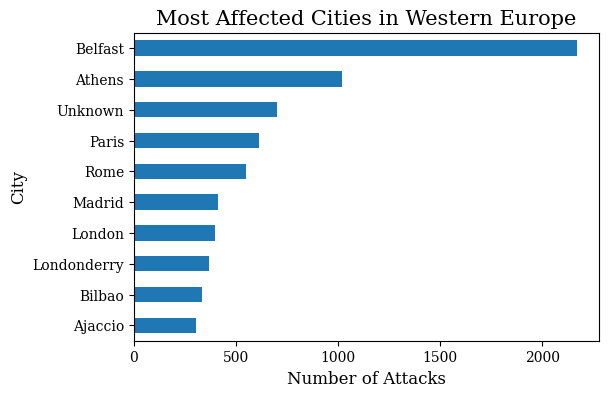

In [26]:
# affected cities in region: Western Europe
df.groupby('region').get_group('Western Europe')['city'].value_counts().nlargest(10).sort_values(ascending=True).plot.barh(figsize=(6,4))
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Attacks', size=12, family='serif')
plt.ylabel('City', size=12, family='serif')
plt.title('Most Affected Cities in Western Europe', size=15, family='serif')
plt.show()

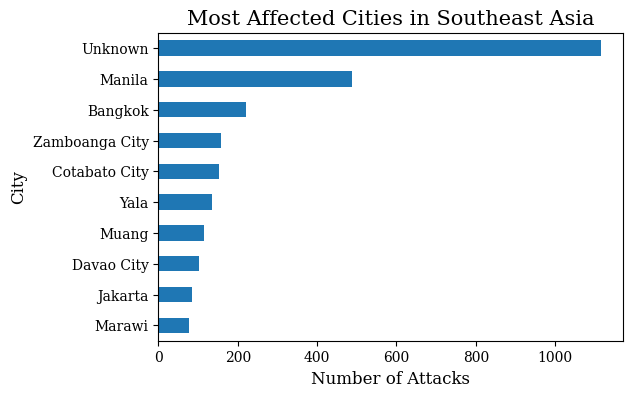

In [27]:
# affected cities in region: Southeast Asia
df.groupby('region').get_group('Southeast Asia')['city'].value_counts().nlargest(10).sort_values(ascending=True).plot.barh(figsize=(6,4))
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Attacks', size=12, family='serif')
plt.ylabel('City', size=12, family='serif')
plt.title('Most Affected Cities in Southeast Asia', size=15, family='serif')
plt.show()

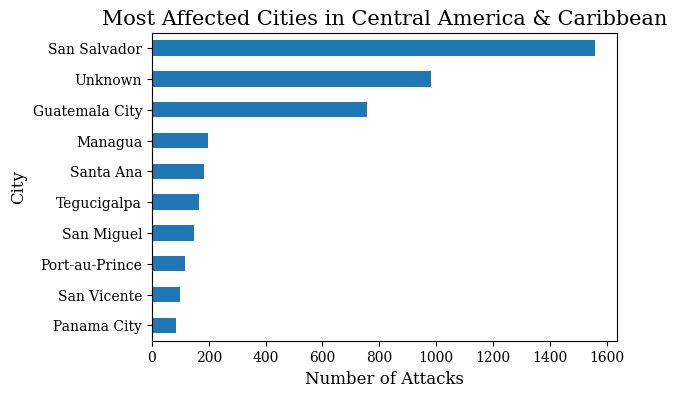

In [28]:
# affected cities in region: Central America & Caribbean
df.groupby('region').get_group('Central America & Caribbean')['city'].value_counts().nlargest(10).sort_values(ascending=True).plot.barh(figsize=(6,4))
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Attacks', size=12, family='serif')
plt.ylabel('City', size=12, family='serif')
plt.title('Most Affected Cities in Central America & Caribbean', size=15, family='serif')
plt.show()

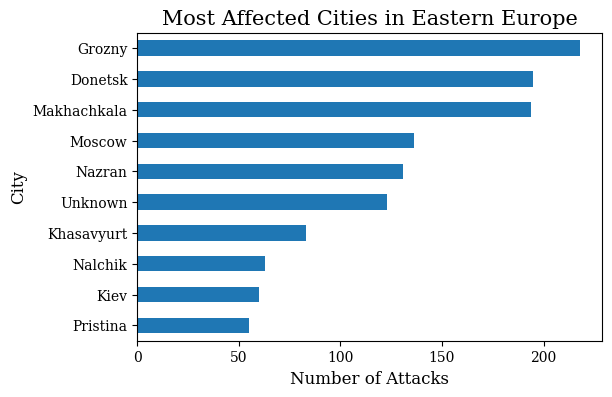

In [29]:
# affected cities in region: Eastern Europe
df.groupby('region').get_group('Eastern Europe')['city'].value_counts().nlargest(10).sort_values(ascending=True).plot.barh(figsize=(6,4))
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Attacks', size=12, family='serif')
plt.ylabel('City', size=12, family='serif')
plt.title('Most Affected Cities in Eastern Europe', size=15, family='serif')
plt.show()

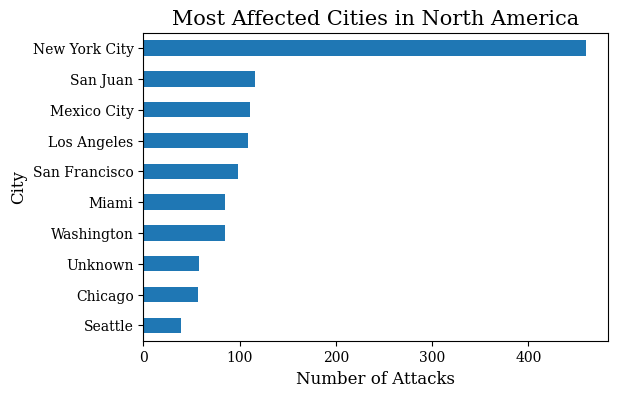

In [30]:
# affected cities in region: North America
df.groupby('region').get_group('North America')['city'].value_counts().nlargest(10).sort_values(ascending=True).plot.barh(figsize=(6,4))
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Attacks', size=12, family='serif')
plt.ylabel('City', size=12, family='serif')
plt.title('Most Affected Cities in North America', size=15, family='serif')
plt.show()

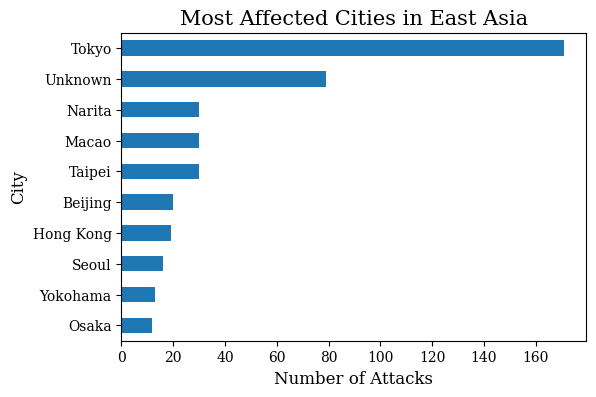

In [31]:
# affected cities in region: East Asia
df.groupby('region').get_group('East Asia')['city'].value_counts().nlargest(10).sort_values(ascending=True).plot.barh(figsize=(6,4))
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Attacks', size=12, family='serif')
plt.ylabel('City', size=12, family='serif')
plt.title('Most Affected Cities in East Asia', size=15, family='serif')
plt.show()

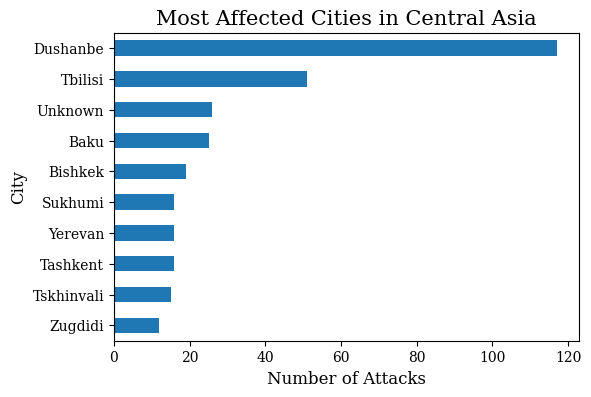

In [32]:
# affected cities in region: Central Asia
df.groupby('region').get_group('Central Asia')['city'].value_counts().nlargest(10).sort_values(ascending=True).plot.barh(figsize=(6,4))
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Attacks', size=12, family='serif')
plt.ylabel('City', size=12, family='serif')
plt.title('Most Affected Cities in Central Asia', size=15, family='serif')
plt.show()

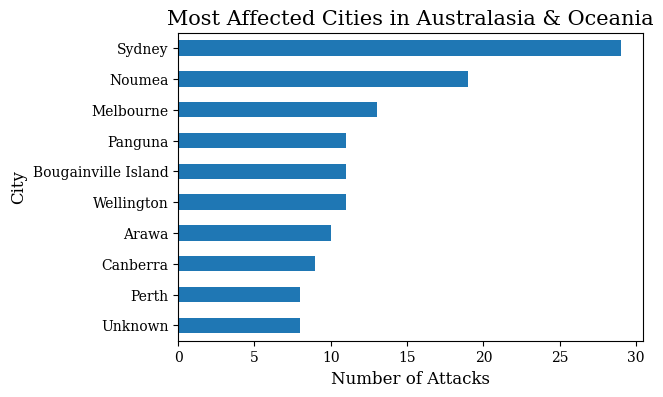

In [33]:
# affected cities in region: Australasia & Oceania
df.groupby('region').get_group('Australasia & Oceania')['city'].value_counts().nlargest(10).sort_values(ascending=True).plot.barh(figsize=(6,4))
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Attacks', size=12, family='serif')
plt.ylabel('City', size=12, family='serif')
plt.title('Most Affected Cities in Australasia & Oceania', size=15, family='serif')
plt.show()

> **Feature:** success

> **Feature Details:** It indicates the success of a terrorist strike, 1 = 'yes' & 0 = 'no'

> **Observation:**

- Success rate is higher

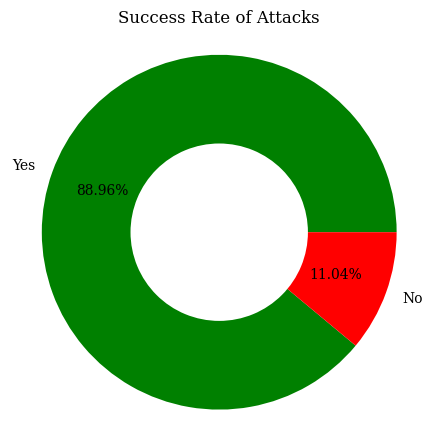

In [34]:
x =df['success'].value_counts(normalize=True).plot.pie(autopct='%.2f%%', pctdistance=.7, labels=['Yes', 'No'],
                                                       colors=['green', 'red'], radius=1.2, textprops=dict(family='serif'))
plt.pie(x=[1], radius=.6, colors=['w'])
plt.ylabel(' ')
plt.title('Success Rate of Attacks', size=12, family='serif', pad=18)
plt.show()

> **Feature:** suicide

> **Feature Details** It indicates whether the attack is a suicide attack (1) or not (0)

> **Observation:**

- Suicide attacks are quite common in Middle East & North Africa & South Asia

In [35]:
df.groupby('region')['suicide'].sum().sort_values()

region
Australasia & Oceania             1
Central America & Caribbean       1
South America                     6
Central Asia                     11
North America                    16
East Asia                        17
Western Europe                   23
Southeast Asia                   28
Eastern Europe                   92
Sub-Saharan Africa              740
South Asia                     1926
Middle East & North Africa     3772
Name: suicide, dtype: int64

> **Feature:** outfit

> **Feature Details:** It indicates the name of the terror group that carried out the attack

> **Observation:**

- Taliban is the most evil terror outfit

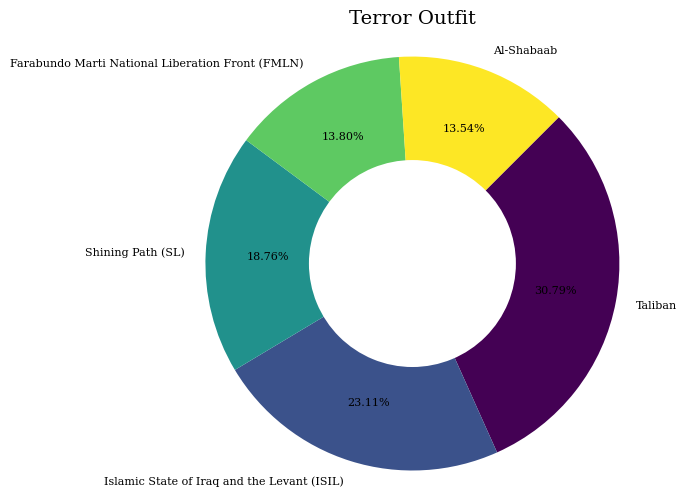

In [36]:
# terror outfit visualization
df['outfit'][df['outfit'] != 'Unknown'].value_counts(normalize=True).nlargest(5).plot.pie(autopct='%.2f%%', 
                                                          pctdistance=.7, cmap='viridis', radius=1.4, startangle=45, 
                                                          textprops=dict(size=8, family='serif'), counterclock=False)

plt.pie(x=[1], colors=['w'], radius=.7)
plt.ylabel(' ')
plt.title('Terror Outfit', size=14, family='serif', pad=40)
plt.show()

> **Feature:** attack_type

> **Feature Details:** It indicates the method of attack and broad class of tactics used

> **Observation:**

- Bombing/Explosion is the mostly preferred way of attack

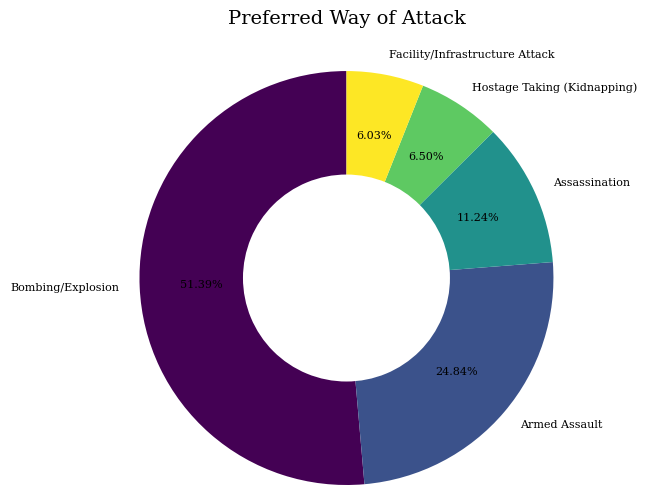

In [37]:
x = df['attack_type'].value_counts().nlargest(5).plot.pie(autopct='%.2f%%', 
                                                          pctdistance=.7, cmap='viridis', radius=1.4, startangle=90, 
                                                          textprops=dict(size=8, family='serif'), counterclock=True)
plt.pie(x=[1], colors=['w'], radius=.7)
plt.ylabel(' ')
plt.title('Preferred Way of Attack', size=14, family='serif', pad=50)
plt.show()

> **Feature:** weapon_type

> **Feature Details:** It indicates the type of weapon used in the incident

> **Observation:**

- Use of explosives is the preferred choice followed by firearms 


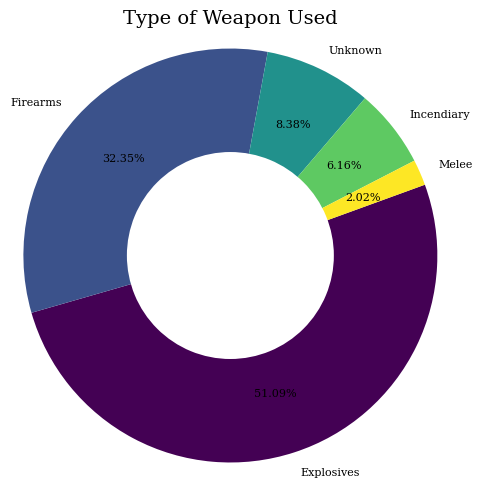

In [38]:
x = df['weapon_type'].value_counts().nlargest(5).plot.pie(autopct='%.2f%%', 
                                                          pctdistance=.7, cmap='viridis', radius=1.4, startangle=20, 
                                                          textprops=dict(size=8, family='serif'), counterclock=False)
plt.pie(x=[1], colors=['w'], radius=.7)
plt.ylabel(' ')
plt.title('Type of Weapon Used', size=14, family='serif', pad=34)
plt.show()

> **Feature:** wounded

> **Feature Details:** It corresponds to the number of the people wounded

> **Observation:**

- Maximum number of wounded people are reported from:

  - Region: Middle East & North Africa

  - City: Baghdad (Iraq)

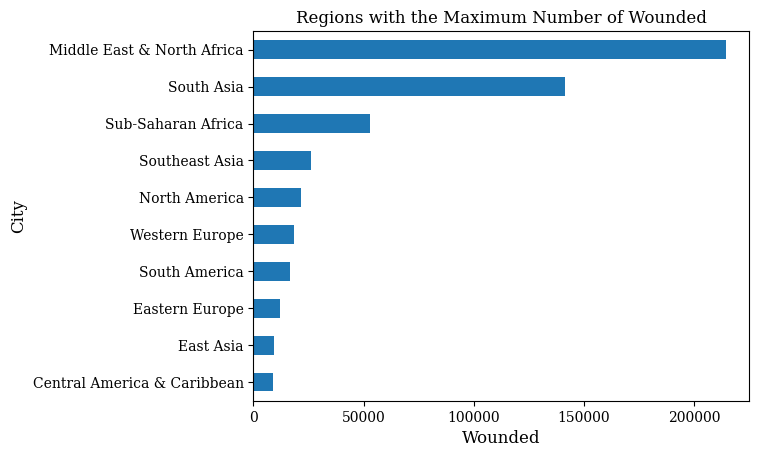

In [39]:
# region-wise wounded
df.groupby('region')['wounded'].sum().nlargest(n=10).sort_values(ascending=True).plot.barh(legend=False)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Wounded', size=12, family='serif')
plt.ylabel('City', family='serif', size=12)
plt.title('Regions with the Maximum Number of Wounded', size=12, family='serif')
plt.show()

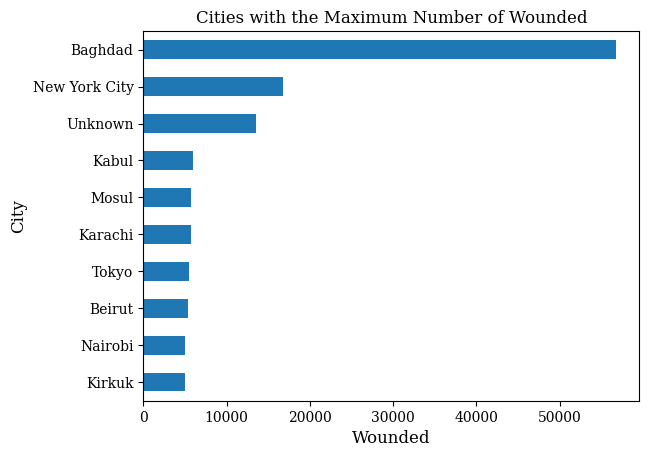

In [40]:
# city-wise wounded
df.groupby('city')['wounded'].sum().nlargest(n=10).sort_values(ascending=True).plot.barh(legend=False)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Wounded', size=12, family='serif')
plt.ylabel('City', family='serif', size=12)
plt.title('Cities with the Maximum Number of Wounded', size=12, family='serif')
plt.show()

> **Feature:** killed

> **Feature Details:** It indicates the total number of confirmed fatalities due to incidents

> **Observation:**

- Maximum number of killings are reported from:

  - Region: Middle East & North Africa

  - City: Baghdad (Iraq)

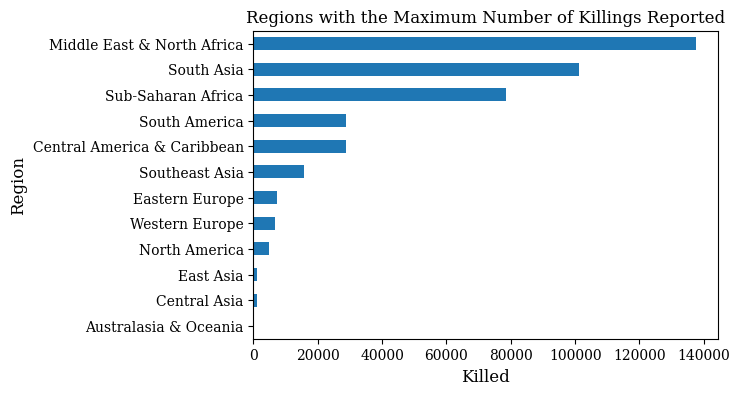

In [41]:
# region-wise killed
df.groupby('region')['killed'].sum().sort_values(ascending=True).plot.barh(legend=False, figsize=(6,4))
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Killed', size=12, family='serif')
plt.ylabel('Region', family='serif', size=12)
plt.title('Regions with the Maximum Number of Killings Reported', size=12, family='serif')
plt.show()

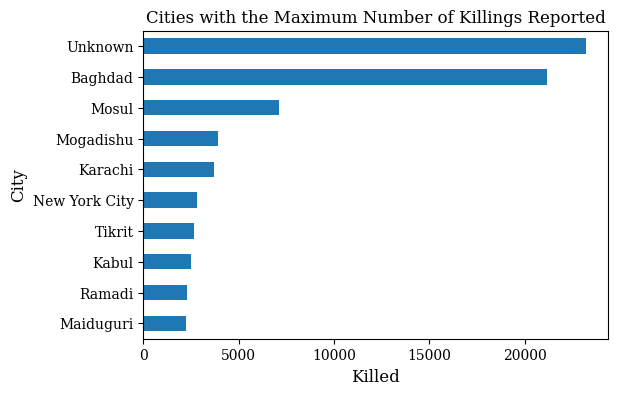

In [42]:
# city-wise killed
df.groupby('city')['killed'].sum().nlargest(n=10).sort_values(ascending=True).plot.barh(legend=False, figsize=(6,4))
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Killed', size=12, family='serif')
plt.ylabel('City', family='serif', size=12)
plt.title('Cities with the Maximum Number of Killings Reported', size=12, family='serif')
plt.show()